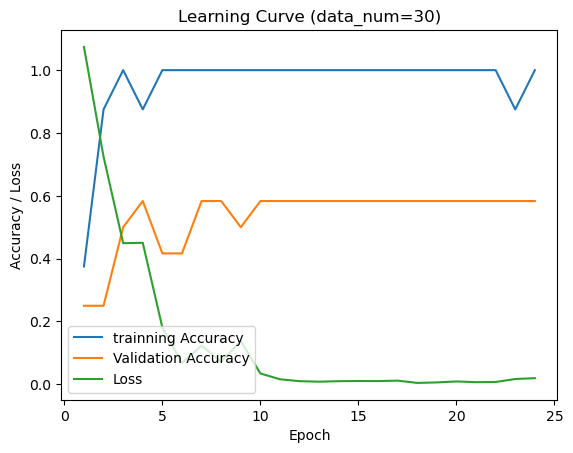

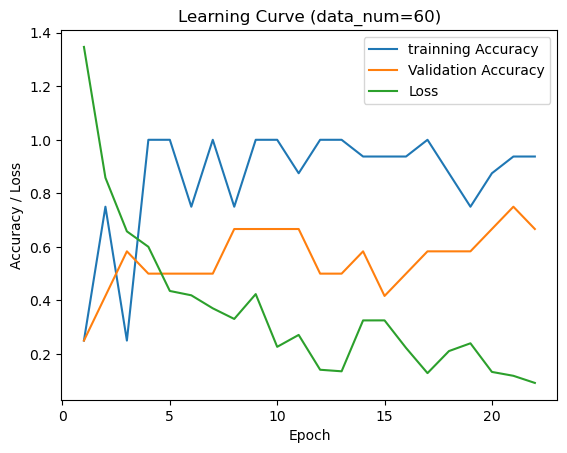

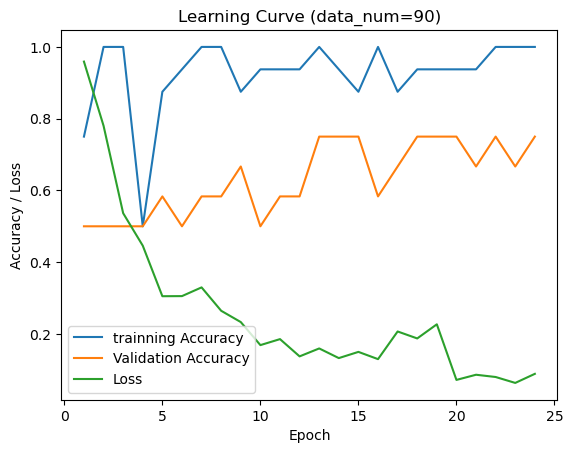

In [19]:
# 学習曲線を使用したバイアスと分散の問題の診断
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('acc.csv')

# 保存データ先
save_dir = './'

# データ数ごとにグラフを分けてプロット
for data_num in [30, 60, 90]:    # データを抽出
    data = df[df['data_num'] == data_num]

    # 新しい図を作成
    plt.figure()

    # エポック数とaccuracyの折れ線グラフをプロット
    plt.plot(data['epoch'], data['train_acc'], label='trainning Accuracy')

    # エポック数とval_accの折れ線グラフをプロット
    plt.plot(data['epoch'], data['val_acc'], label='Validation Accuracy')

    # エポック数とlossの折れ線グラフをプロット
    plt.plot(data['epoch'], data['loss'], label='Loss')

    # グラフのタイトルと軸ラベルを設定
    plt.title(f'Learning Curve (data_num={data_num})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Loss')

    # 凡例を表示
    plt.legend()

    # グラフを保存
    # plt.savefig(f'{save_dir}/learning_curve_data_num_{data_num}.png')

    # グラフを表示
    plt.show()
